In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=4)


In [ ]:
advertising=pd.read_csv("Advertising.csv")

advertising

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [ ]:
x=advertising["TV"]
y=advertising["Radio"]
z=advertising["Sales"]

In [ ]:
a=np.array([x,y]).T
regresion=LinearRegression()
a_poly=poly_reg.fit_transform(a)
regresion.fit(a_poly,z)
#regresion.predict([[10,15]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

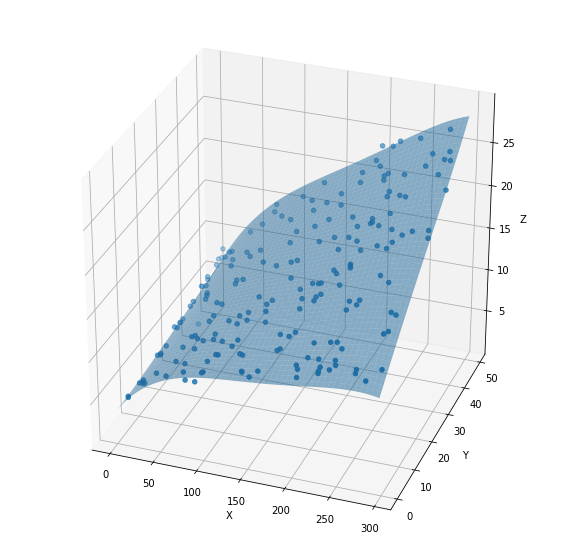

In [ ]:
Figura=plt.figure(figsize=(10,10))
AX=plt.axes(projection = "3d")

AX.set_xlabel("X")
AX.set_ylabel("Y")
AX.set_zlabel("Z")

AX.scatter3D(x,y,z)

a_predict= np.linspace(x.min(),x.max(),100)
b_predict= np.linspace(y.min(),y.max(),100)
c_predict=np.zeros(10000).reshape(100,100)

X,Y=np.meshgrid(a_predict,b_predict)

for i in range(100):
  for k in range(100):
    predict_line=regresion.predict(poly_reg.fit_transform([[X[i][k],Y[i][k]]]))
    c_predict[i][k]=predict_line
AX.plot_surface(X,Y,c_predict,alpha=0.5)
AX.view_init(30,-70)
